# Analysis of PCA

In [47]:
import pandas as pd

df = pd.read_csv('0-data/simcosta_buoySC-1_marchtojune_2017.csv', index_col = 'datetime')

Text(0.5, 1.0, 'Correlation Heatmap')

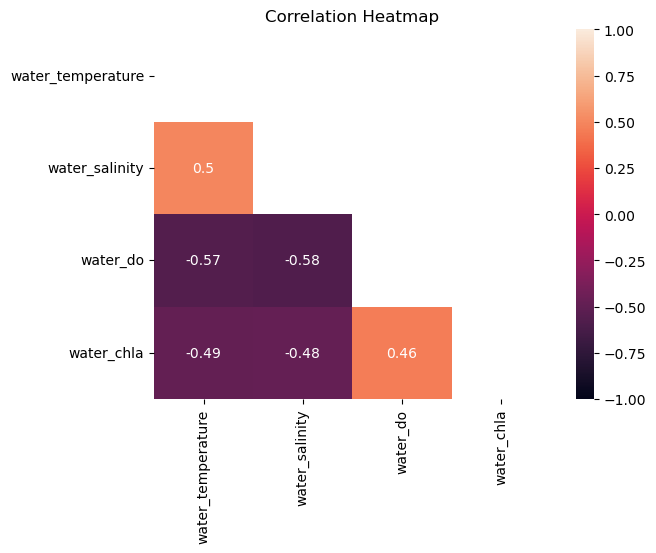

In [50]:
import seaborn
import numpy as np

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

heatmap = seaborn.heatmap(corr, vmin=-1, vmax=1, annot=True, mask = mask);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [26]:
def z_score(x):
    """Remove a média e normaliza os pelo desvio padrão"""
    return (x - x.mean()) / x.std()

In [27]:
time_series = df[["water_temperature", "water_salinity", "water_do", "water_chla"]]
zs = time_series.apply(z_score).T
zs

datetime,2017-03-01 12:00:00,2017-03-01 13:00:00,2017-03-01 14:00:00,2017-03-01 15:00:00,2017-03-01 16:00:00,2017-03-01 17:00:00,2017-03-01 18:00:00,2017-03-01 19:00:00,2017-03-01 20:00:00,2017-03-01 21:00:00,...,2017-06-30 14:00:00,2017-06-30 15:00:00,2017-06-30 16:00:00,2017-06-30 17:00:00,2017-06-30 18:00:00,2017-06-30 19:00:00,2017-06-30 20:00:00,2017-06-30 21:00:00,2017-06-30 22:00:00,2017-06-30 23:00:00
water_temperature,1.176144,1.234075,1.274573,1.291550,1.283112,1.264160,1.253792,1.261731,1.260209,1.228259,...,-1.453032,-1.458423,-1.472118,-1.494022,-1.515334,-1.525602,-1.541645,-1.577690,-1.608058,-1.597092
water_salinity,0.742126,0.751111,0.768020,0.779962,0.777651,0.766222,0.754412,0.747193,0.734463,0.712940,...,-0.322509,-0.284137,-0.281795,-0.289375,-0.273093,-0.278979,-0.286059,-0.263060,-0.230255,-0.220804
water_do,-0.217620,-0.216103,-0.216588,-0.219457,-0.225095,-0.233886,-0.246213,-0.261922,-0.278701,-0.294187,...,1.022991,1.074444,0.884548,0.578177,0.340455,0.282807,0.221869,-0.011303,-0.233186,-0.172141
water_chla,-0.534015,-0.598614,-0.739298,-0.874569,-0.922934,-0.802896,-0.557696,-0.567228,-0.686968,-0.693747,...,0.595483,0.624624,0.652160,0.669630,0.592420,0.265310,0.392986,1.442361,1.993199,0.153473


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(zs);

In [29]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ["PC %s" % pc for pc in loadings.index + 1]
loadings.columns = ["TS %s" % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3,TS 4
PC 1,-0.015422,-0.008390,-0.006194,-0.057801
PC 2,-0.016159,-0.009792,-0.006771,0.982291
PC 3,-0.017275,-0.012391,-0.006557,-0.093345
PC 4,-0.018210,-0.014765,-0.006046,-0.000613
PC 5,-0.018449,-0.015493,-0.005743,-0.001914
...,...,...,...,...
PC 2912,0.013657,0.005963,0.022328,-0.000321
PC 2913,0.014128,0.009291,0.021645,0.002594
PC 2914,0.018599,0.032003,0.016946,-0.001487
PC 2915,0.020287,0.045733,0.014625,0.001350


In [ ]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ["PC %s" % pc for pc in loadings.index + 1]
loadings.columns = ["TS %s" % pc for pc in loadings.columns + 1]
loadings

In [31]:
PCs = np.dot(loadings.values.T, df)

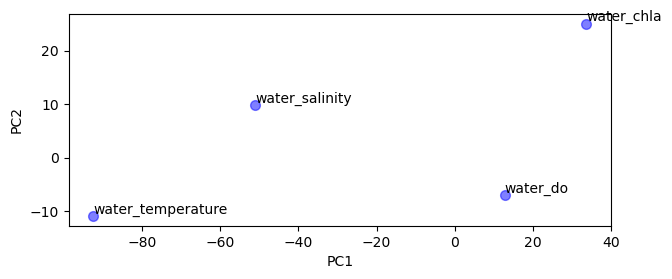

In [35]:
import matplotlib.pyplot as plt

line = {"linewidth": 1, "linestyle": "--", "color": "k"}
marker = {"linestyle": "none", "marker": "o", "markersize": 7, "color": "blue", "alpha": 0.5}


fig, ax = plt.subplots(figsize=(7, 2.75))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [
    ax.text(x, y, t) for x, y, t in
    zip(PCs[0], PCs[1]+0.5, df.columns)
]